### Import Packages

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import seaborn
import yfinance as yf

%matplotlib inline

### Initializing Arrays and Importing Data 

In [65]:
stocks = ['BTC-USD' ,'^RUT']
start = '2019-12-31'
end = '2021-08-09'
fee = 0.001
window = 252
t_threshold = -2.5
#retrieve data
data = pd.DataFrame()
returns = pd.DataFrame()
for stock in stocks:
    prices = yf.download(stock, start, end)
    data[stock] = prices['Close']
    returns[stock] = np.append(data[stock][1:].reset_index(drop=True)/data[stock][:-1].reset_index(drop=True) - 1, 0)
btcusd = stocks[0]
rut1 = stocks[1]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Data Cleaning

In [66]:
newdata = data.dropna()

In [71]:
newdata

,BTC-USD,^RUT,pctbtc,pctrut
Date,,,,
2020-01-02,6985.470215,1666.770020,-0.028933,-0.001019
2020-01-03,7344.884277,1660.869995,0.051452,-0.003540
2020-01-06,7769.219238,1663.260010,0.057773,0.001439
2020-01-07,8163.692383,1658.310059,0.050774,-0.002976
2020-01-08,8079.862793,1663.589966,-0.010269,0.003184
...,...,...,...,...
2021-08-02,39201.945312,2215.500000,-0.071826,-0.004829
2021-08-03,38152.980469,2223.580078,-0.026758,0.003647
2021-08-04,39747.503906,2196.320068,0.041793,-0.012260


In [78]:
newdata['pctbtc] = newdata['BTC-USD'].pct_change()
newdata['pctrut'] = newdata['^RUT'].pct_change()
newdata.drop(index=newdata.index[0], 
      axis=0, 
      inplace=True)

### Plotting Data using BTC and RUT Prices & Calculating the LinReg

beta =  0.01974006505392805
Corr =  0.8923051738360366


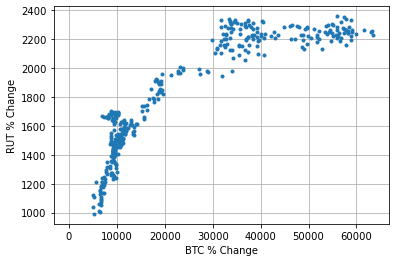

In [73]:
#plt.plot(newdata['pctbtc'], newdata['pctrut'], '.')
plt.plot(newdata['BTC-USD'], newdata['^RUT'], '.')
plt.grid(True)
plt.xlabel('BTC % Change')
plt.ylabel('RUT % Change')

slope, intercept, r_value, p_value, std_err = linregress(newdata['BTC-USD'], newdata['^RUT'])
x = np.linspace(-.1, .1)
plt.plot(x, slope * x + intercept, 'k')
print('beta = ', slope)
print('Corr = ', r_value)

### Plotting Data using BTC and RUT % Changes For Each Day

beta =  0.1652302110844052
Corr =  0.3560902092978094


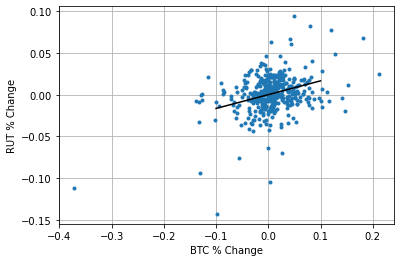

In [74]:
plt.plot(newdata['pctbtc'], newdata['pctrut'], '.')
plt.grid(True)
plt.xlabel('BTC % Change')
plt.ylabel('RUT % Change')

slope, intercept, r_value, p_value, std_err = linregress(newdata['pctbtc'], newdata['pctrut'])
x = np.linspace(-.1, .1)
plt.plot(x, slope * x + intercept, 'k')
print('beta = ', slope)
print('Corr = ', r_value)